In [1]:
import pandas as pd
import os
import seaborn as sb
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, Title
from bokeh.io import output_notebook
from bokeh.models.tools import HoverTool


C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[COVID Github Page](https://github.com/CSSEGISandData/COVID-19)

In [2]:
url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
#url3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

covx = pd.read_csv(url,index_col=0,parse_dates=[0])
covy = pd.read_csv(url2,index_col=0,parse_dates=[0])
#covz = pd.read_csv(url3,index_col=0,parse_dates=[0])

In [3]:
covx

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
cov0 = covx.reset_index()
cov0y = covy.reset_index()
#cov0z = covz.reset_index()

In [5]:
cov0

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
path = os.getcwd()

In [7]:
covlst = ['US', 'Canada', 'South Korea', 'Italy', 'Iran', 'UK', 'United Kingdom', 'Mexico']

In [8]:
cov = cov0[(cov0['Country/Region'].isin(covlst))]

In [9]:
cov

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,542,542,621,661,690,754,969,969,1075,1181
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,725,884,884,970,1013,1013,1121,1174,1203,1203
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,39,64,72,96,103,127,167,182,182,203
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,45,51,66,68,70,81,91,91,91,98
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,102,120,135,148,152,175,183,195,195,217
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,90,110,122,127,147,173,193,207,236,262
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,994,1144,1355,1706,1966,2392,2793,3255,3630,4354
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,9,11,11,18,21,21,22,22,22,22
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,2024,2498,2840,3430,4162,4611,5518,6101,6101,7944


In [10]:
#change the file from wide to long
df0 = cov.set_index(['Province/State','Country/Region', 'Lat', 'Long']).stack().reset_index(level=4).reset_index()


In [11]:
df0

,Province/State,Country/Region,Lat,Long,level_4,0
0,Alberta,Canada,53.9333,-116.5765,1/22/20,0
1,Alberta,Canada,53.9333,-116.5765,1/23/20,0
2,Alberta,Canada,53.9333,-116.5765,1/24/20,0
3,Alberta,Canada,53.9333,-116.5765,1/25/20,0
4,Alberta,Canada,53.9333,-116.5765,1/26/20,0
...,...,...,...,...,...,...
2245,Falkland Islands (Islas Malvinas),United Kingdom,-51.7963,-59.5236,4/1/20,0
2246,Falkland Islands (Islas Malvinas),United Kingdom,-51.7963,-59.5236,4/2/20,0
2247,Falkland Islands (Islas Malvinas),United Kingdom,-51.7963,-59.5236,4/3/20,0
2248,Falkland Islands (Islas Malvinas),United Kingdom,-51.7963,-59.5236,4/4/20,1


In [12]:
df = df0[df0[0]>=1]

In [13]:
df

,Province/State,Country/Region,Lat,Long,level_4,0
44,Alberta,Canada,53.9333,-116.5765,3/6/20,1
45,Alberta,Canada,53.9333,-116.5765,3/7/20,2
46,Alberta,Canada,53.9333,-116.5765,3/8/20,4
47,Alberta,Canada,53.9333,-116.5765,3/9/20,7
48,Alberta,Canada,53.9333,-116.5765,3/10/20,7
...,...,...,...,...,...,...
2172,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,4/3/20,5
2173,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,4/4/20,5
2174,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,4/5/20,5
2248,Falkland Islands (Islas Malvinas),United Kingdom,-51.7963,-59.5236,4/4/20,1


In [14]:
#convert the date from text to date format
df['date'] = pd.to_datetime(df['level_4'])
df['value'] = df[0]

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df['date'].max()

Timestamp('2020-04-05 00:00:00')

In [16]:
#drop the province varible
df.drop(['Province/State', 'level_4', 0, 'Lat', 'Long' ], inplace=True, axis=1)

C:\WPy-3670\python-3.6.7.amd64\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df

,Country/Region,date,value
44,Canada,2020-03-06,1
45,Canada,2020-03-07,2
46,Canada,2020-03-08,4
47,Canada,2020-03-09,7
48,Canada,2020-03-10,7
...,...,...,...
2172,United Kingdom,2020-04-03,5
2173,United Kingdom,2020-04-04,5
2174,United Kingdom,2020-04-05,5
2248,United Kingdom,2020-04-04,1


In [18]:
#sum up country numbers
df2 = df.groupby(['Country/Region', 'date']).sum().reset_index()

In [19]:
df2

,Country/Region,date,value
0,Canada,2020-01-26,1
1,Canada,2020-01-27,1
2,Canada,2020-01-28,2
3,Canada,2020-01-29,2
4,Canada,2020-01-30,2
...,...,...,...
358,United Kingdom,2020-04-01,29865
359,United Kingdom,2020-04-02,34173
360,United Kingdom,2020-04-03,38689
361,United Kingdom,2020-04-04,42477


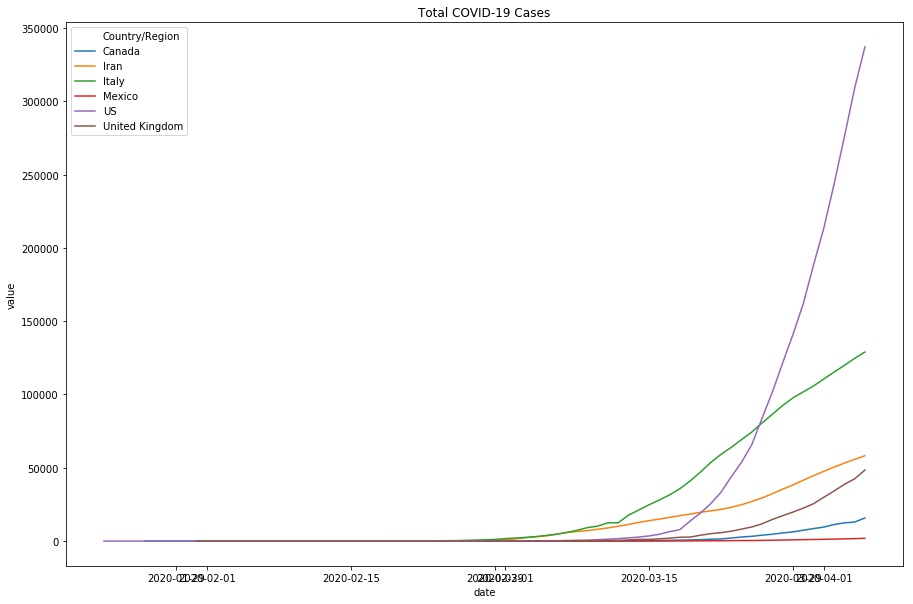

In [20]:
plt.figure(figsize=(15, 10))

s = sb.lineplot('date', 'value', data=df2, hue='Country/Region')

plt.title('Total COVID-19 Cases')

plt.show()

[Seaborn](https://seaborn.pydata.org/index.html)

In [30]:
country = ['Canada']

In [31]:
UScases = df2[(df2['Country/Region'].isin(country))]

In [36]:
YOUR_FONT_SIZE = '7pt'
#output_file("USCovid.html")

source = ColumnDataSource(UScases)

p = figure(x_axis_type="datetime", plot_width=750, plot_height=300)

p.circle(x='date', y='value', source=UScases, color = 'blue', size = 6)
p.line(x='date', y='value', line_width = 1, source=UScases, color = 'blue')
p.legend.location = 'bottom_right'

p.add_tools(HoverTool(
    tooltips=[
        ( 'date',   '@date{%F}'),
        ( '# of Cases', '@value'),
    ],

    formatters={
        'date'      : 'datetime', # use 'datetime' formatter for 'date' field
      },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

p.xaxis[0].axis_label = 'Date'
p.yaxis[0].axis_label = '# of Cases (cumulative)'


#p.add_layout(Title(text=market), 'above')
p.add_layout(Title(text=('Covid-19 Cases - Linear Scale' + '-Country = ' + country[0])), 'above')

show(p)



In [37]:
YOUR_FONT_SIZE = '7pt'
output_file("USCovid.html")

source = ColumnDataSource(UScases)

p = figure(x_axis_type="datetime", y_axis_type="log", plot_width=750, plot_height=300)

p.circle(x='date', y='value', source=UScases, color = 'blue', size = 6)
p.line(x='date', y='value', line_width = 1, source=UScases, color = 'blue')
p.legend.location = 'bottom_right'

p.add_tools(HoverTool(
    tooltips=[
        ( 'date',   '@date{%F}'),
        ( '# of Cases', '@value'),
    ],

    formatters={
        'date'      : 'datetime', # use 'datetime' formatter for 'date' field
      },

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

p.xaxis[0].axis_label = 'Date'
p.yaxis[0].axis_label = '# of Cases (cumulative)'


#p.add_layout(Title(text=market), 'above')
p.add_layout(Title(text='Covid-19 Cases - Logrithmic Scale' + '-Country = ' + country[0]), 'above')


show(p)


[Bokeh Visualization](https://docs.bokeh.org/en/latest/index.html#)

[Covid 19 Tracker](https://www.worldometers.info/coronavirus/country/us/)